In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.formula.api as smf
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df['Date']=pd.to_datetime(df["Date"])

In [8]:
df['Date'].dtype

dtype('<M8[ns]')

In [9]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [10]:
df['Time']=pd.to_datetime(df['Time'])

In [11]:
df['Time'].dtype

dtype('<M8[ns]')

In [12]:
df['Hour']=df['Time'].dt.hour


In [13]:
df['Hour'].nunique()

11

# Exploratory Data Analysis

<Axes: xlabel='Customer type', ylabel='count'>

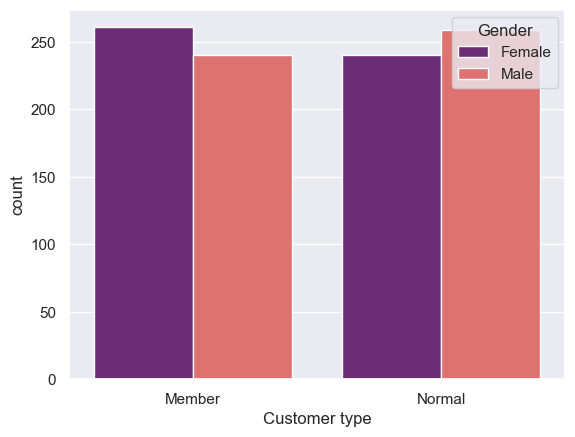

In [14]:
sns.set_theme()
sns.countplot(x = 'Customer type', data = df, hue = 'Gender', palette = "magma")

There is a noticeable difference between male and female population of each category. however, the same plot without says that the total number of people in both categories is almost equal. 

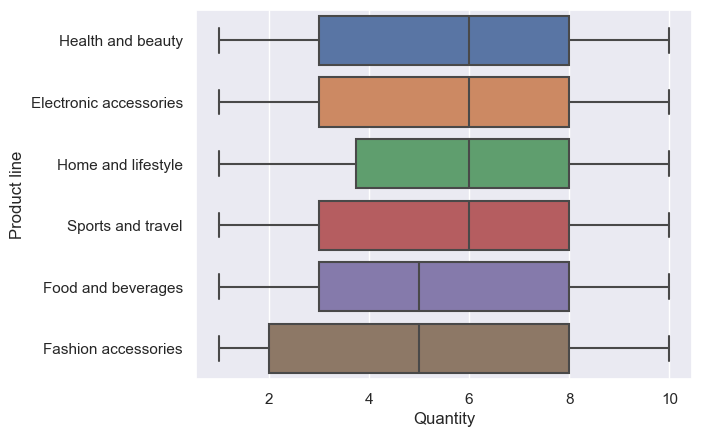

In [15]:
sns.boxplot(x='Quantity',y='Product line',data=df);

Health and beauty,electronic accessories , home and life style , sports and travel havee the better quantity avearage sales.

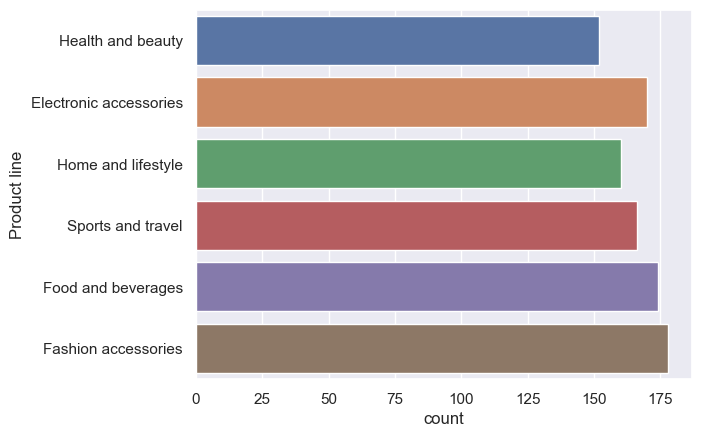

In [16]:
sns.countplot(y='Product line',data=df);

From the figure above fashion accessories is the highst common sold but the healthy and beauty is the lowest

<Axes: xlabel='Product line', ylabel='Unit price'>

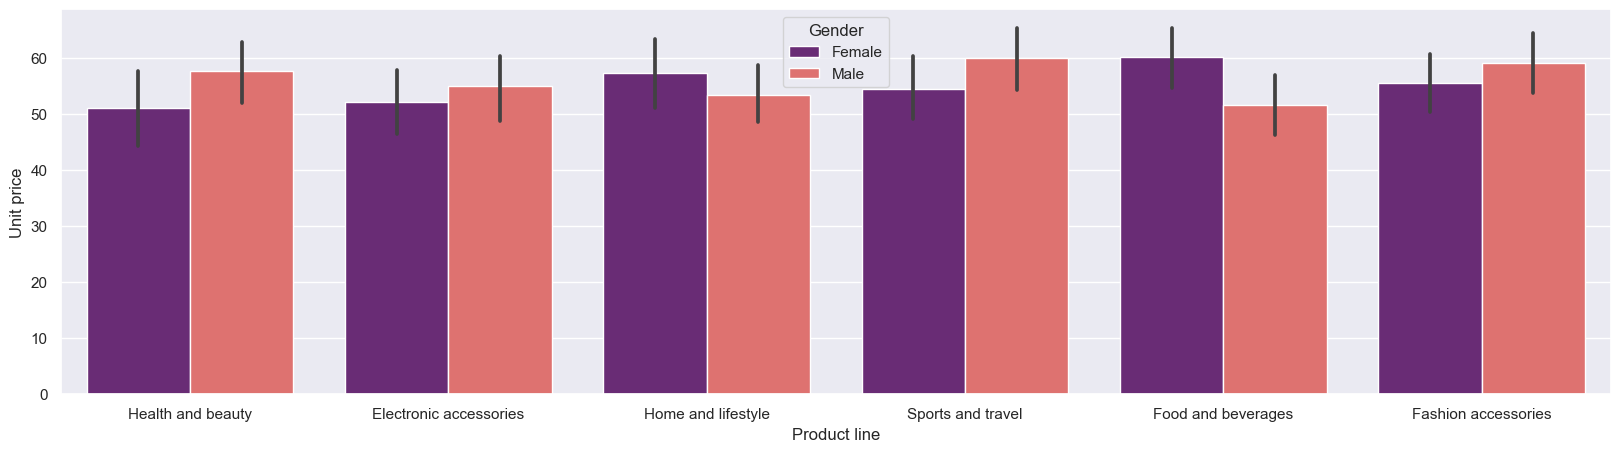

In [17]:
sns.set_theme()
plt.figure(figsize = (20,5))
sns.barplot(x = 'Product line',y = 'Unit price', data = df, palette = 'magma', hue ='Gender')

The unit price of all product lines are nearly same as well as their error margins. this is also true when y = 'Ratings', the product unit price difference between both genders is slighly noticeable and has large margins, so maybe significant.

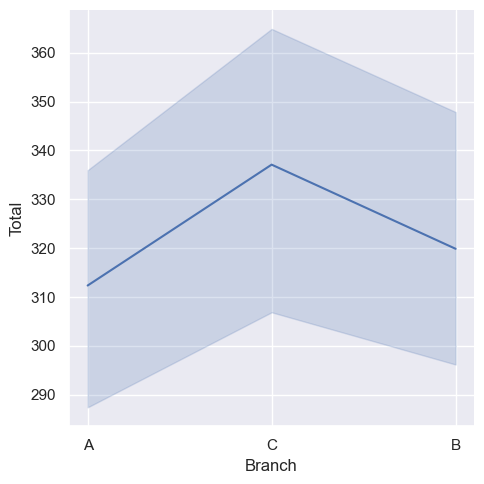

In [18]:
sns.relplot(data=df, x="Branch", y="Total",kind="line")

Branch c has the highst total rate of sales

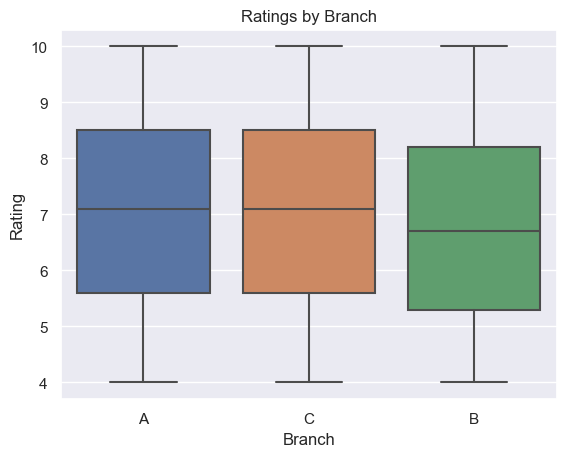

In [19]:
 sns.boxplot(x="Branch", y = "Rating" ,data =df).set_title("Ratings by Branch");

Branch b has the lowest total rate of sales

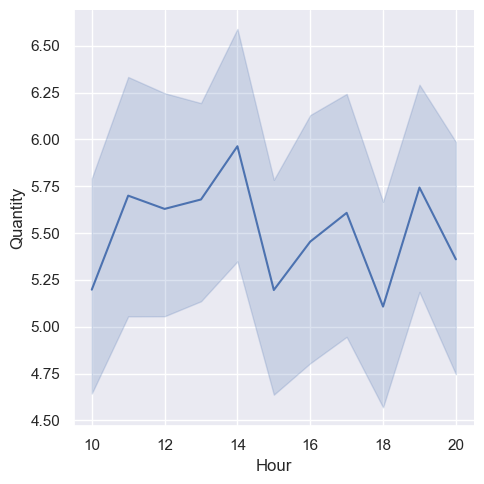

In [20]:
sns.relplot(data=df, x="Hour", y="Quantity",kind="line");

At the hour 14 , highst quantity is sold ever

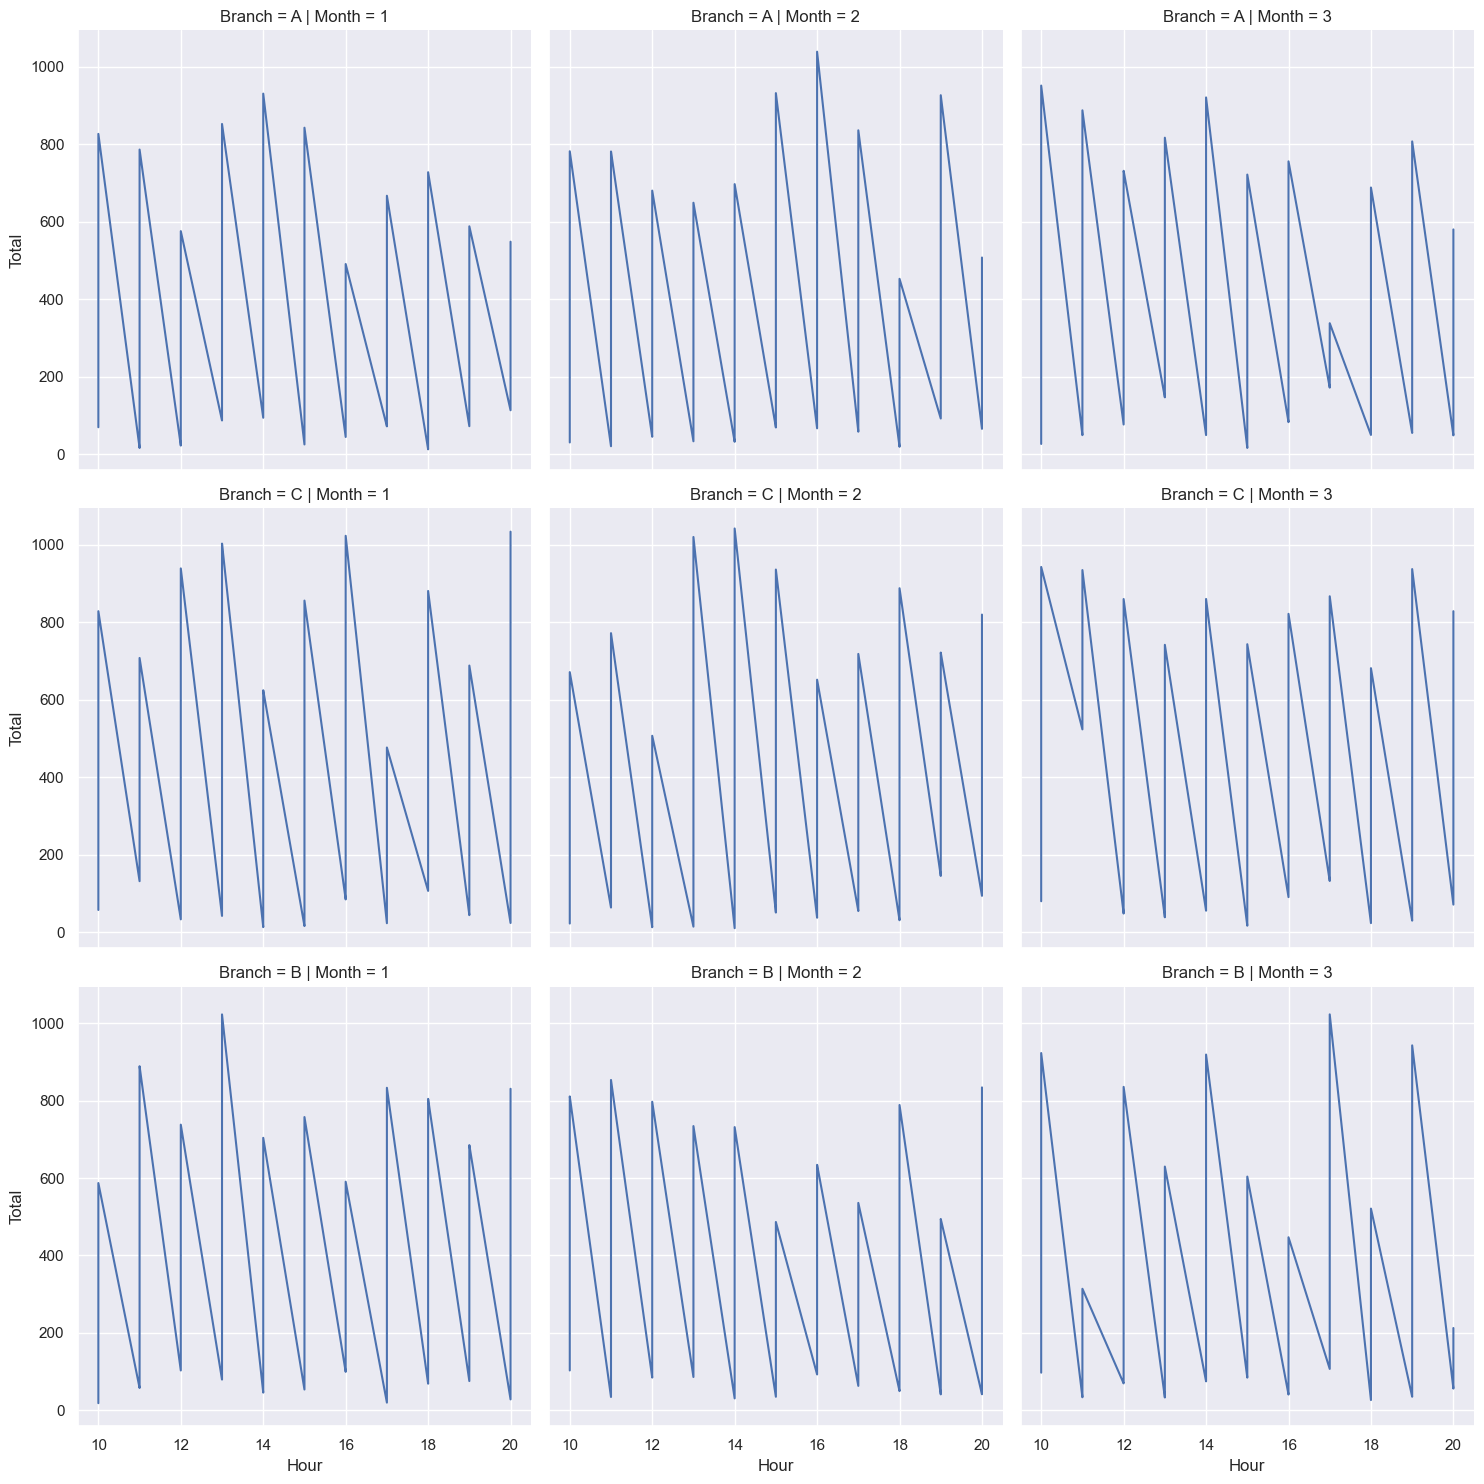

In [21]:
sns.relplot(x="Hour",  y = 'Total', col= 'Month' , row= 'Branch', estimator = None, kind="line", data =df)

We can see from figure above the total of sales in 3 branches through 3 monthes per hour

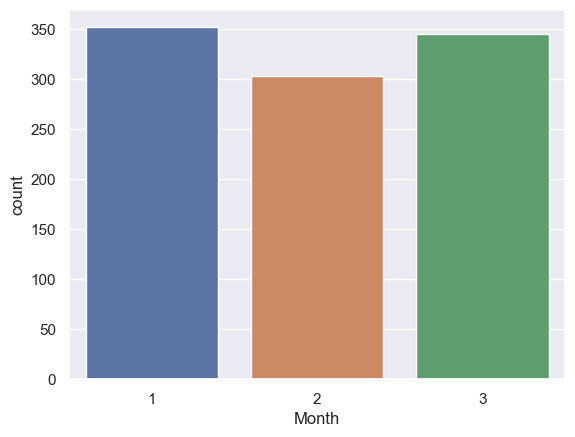

In [22]:
sns.countplot(data=df, x="Month");

Months with the highst rate of sales are 3 and 1

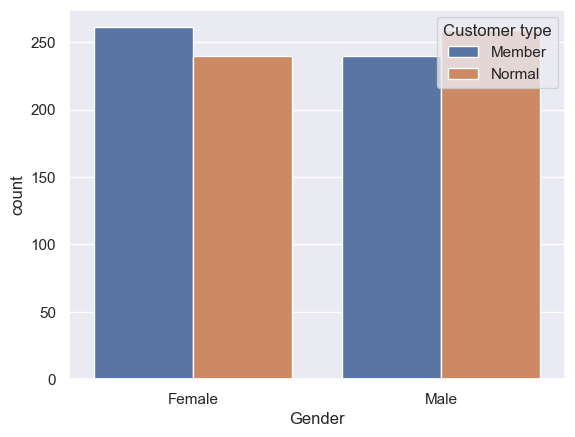

In [23]:
sns.countplot(data=df, x="Gender",hue='Customer type');

Most of female customers are members but the most of males customers are normals

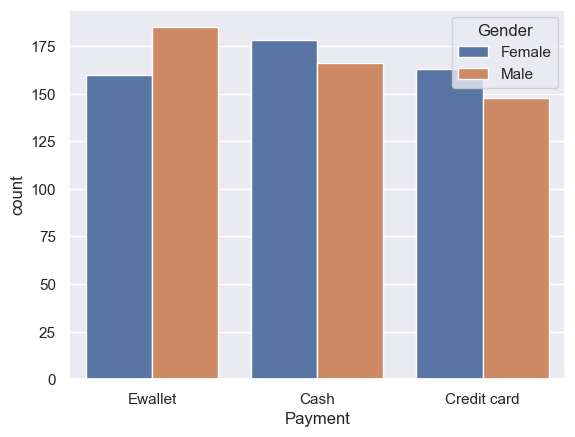

In [24]:
sns.countplot(data=df, x="Payment",hue='Gender');


Most of males customers prefers Ewallet payment but most of females customers prefer cash payment

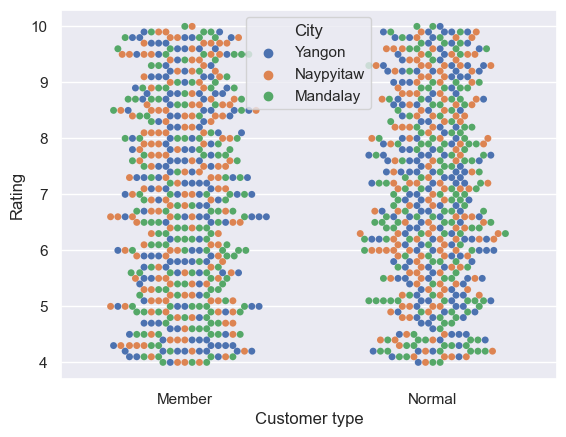

In [25]:
sns.swarmplot(x='Customer type',y='Rating',hue='City',data=df);

# Modeling

In [26]:
X = df['Rating']
y = df['Total']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.50,random_state=100)

In [29]:
X_train.shape

(500,)

In [30]:
X_train.values.reshape(-1,1)

array([[ 7.7],
       [ 6.3],
       [ 7.8],
       [ 5.1],
       [ 4.1],
       [ 6.3],
       [ 6.2],
       [ 6.7],
       [ 9.1],
       [ 5.5],
       [ 8.2],
       [ 5.4],
       [ 4.8],
       [ 8.6],
       [ 5.5],
       [ 9.1],
       [ 9.8],
       [ 7.4],
       [ 4.5],
       [ 5.8],
       [ 7.1],
       [ 8.6],
       [ 6.6],
       [ 4.7],
       [ 5.8],
       [ 9.5],
       [ 8.7],
       [ 9.1],
       [ 5.1],
       [ 9.3],
       [ 7.8],
       [ 9.4],
       [ 9.8],
       [ 4.3],
       [ 7.4],
       [ 4.2],
       [ 4.1],
       [ 5.2],
       [ 8.4],
       [ 9.6],
       [ 7.1],
       [ 9. ],
       [10. ],
       [ 9.5],
       [ 5.5],
       [ 7. ],
       [ 5.9],
       [ 4.5],
       [ 4.5],
       [ 6.7],
       [ 7.2],
       [ 7.6],
       [ 4.1],
       [ 5.5],
       [ 8.4],
       [ 5.1],
       [ 7.7],
       [ 5.5],
       [ 7.8],
       [ 6.7],
       [ 7.4],
       [ 9.5],
       [ 4.3],
       [ 4.8],
       [ 6.4],
       [ 7.6],
       [ 5

In [31]:
X_train.values.reshape(-1,1).shape

(500, 1)

In [32]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
lr.predict([[2.9]])

array([365.57964339])

In [36]:
y_pred = lr.predict(X_test)

In [37]:
X_test

array([[ 4.2],
       [ 4.8],
       [ 6.9],
       [ 5. ],
       [ 9. ],
       [ 7.3],
       [ 8.7],
       [ 8.6],
       [ 7.4],
       [ 5.1],
       [ 4.7],
       [ 8. ],
       [ 9.2],
       [ 4. ],
       [ 8.9],
       [ 4.3],
       [ 6.8],
       [ 6.6],
       [ 5.2],
       [ 8.2],
       [ 5.4],
       [ 8.5],
       [ 7.1],
       [ 7.2],
       [ 5.3],
       [ 7.5],
       [ 8.6],
       [ 8.1],
       [ 5.7],
       [ 7.8],
       [ 8.9],
       [ 4.4],
       [ 6.1],
       [ 6.9],
       [ 4.4],
       [ 9. ],
       [ 8.6],
       [ 8.1],
       [ 5.9],
       [ 4.5],
       [ 9.4],
       [ 9. ],
       [ 5.4],
       [ 9.8],
       [ 6.1],
       [ 7.4],
       [ 7.3],
       [ 6. ],
       [ 6.8],
       [ 8.4],
       [ 9.8],
       [ 5.2],
       [ 9.4],
       [ 5.5],
       [ 9.4],
       [ 7.6],
       [ 6.3],
       [ 5. ],
       [ 8.6],
       [ 8.3],
       [ 7. ],
       [ 5.5],
       [ 9.3],
       [ 6. ],
       [ 6. ],
       [ 9.8],
       [ 6

In [38]:
y_pred

array([355.70870398, 351.1528858 , 335.20752215, 349.63427974,
       319.2621585 , 332.17031003, 321.5400676 , 322.29937063,
       331.411007  , 348.87497671, 351.91218883, 326.85518881,
       317.74355244, 357.22731005, 320.02146153, 354.94940095,
       335.96682518, 337.48543124, 348.11567368, 325.33658275,
       346.59706761, 323.05867366, 333.68891609, 332.92961306,
       347.35637065, 330.65170397, 322.29937063, 326.09588578,
       344.31915852, 328.37379487, 320.02146153, 354.19009792,
       341.2819464 , 335.20752215, 354.19009792, 319.2621585 ,
       322.29937063, 326.09588578, 342.80055246, 353.43079489,
       316.22494638, 319.2621585 , 346.59706761, 313.18773426,
       341.2819464 , 331.411007  , 332.17031003, 342.04124943,
       335.96682518, 323.81797669, 313.18773426, 348.11567368,
       316.22494638, 345.83776458, 316.22494638, 329.89240094,
       339.76334034, 349.63427974, 322.29937063, 324.57727972,
       334.44821912, 345.83776458, 316.98424941, 342.04

In [39]:
y_test

249    536.9910
353    255.1500
537    102.8370
424     17.0940
564    208.4250
         ...   
825     92.4420
426    390.7995
532    240.9750
991    804.3000
481    344.4000
Name: Total, Length: 500, dtype: float64

In [40]:
len(y_test)

500

In [41]:
x_range = [i for i in range(len(y_test))]

In [42]:
x_range

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


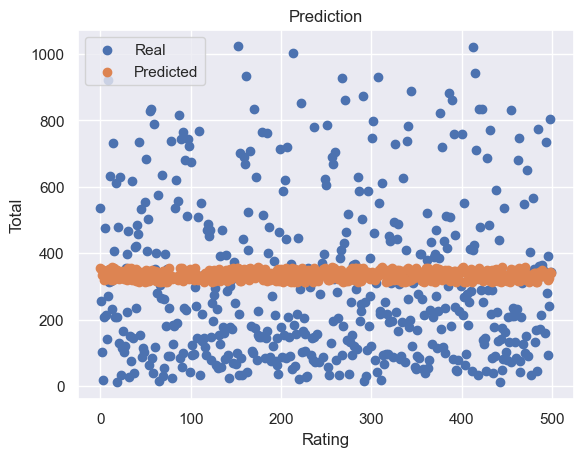

In [43]:
plt.scatter(x_range, y_test)
plt.scatter(x_range, y_pred)
plt.title('Prediction')
plt.xlabel('Rating')
plt.ylabel('Total')
plt.legend(["Real", "Predicted"])
plt.show()

In [44]:
mean_squared_error(y_test,y_pred)

57722.4011617972

In [45]:
mse = mean_squared_error(y_test,y_pred)

In [46]:
rsq = r2_score(y_test,y_pred)

In [47]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 57722.4011617972
r square : -0.010844109236352484


In [48]:
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 387.59943128165213
Coefficient of the line: [-7.59303031]


In [49]:
model = smf.ols(formula = 'Total ~ Rating', data = df)

In [50]:
result = model.fit()

# OLS Regression Result

In [51]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.327
Date:                Fri, 05 May 2023   Prob (F-statistic):              0.250
Time:                        14:52:40   Log-Likelihood:                -6922.6
No. Observations:                1000   AIC:                         1.385e+04
Df Residuals:                     998   BIC:                         1.386e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    359.3216     32.502     11.056      0.0

# Model Testing

In [52]:
def predict(x):
    a= lr.predict([[x]])
    return a

In [53]:
predict(3.5)

array([361.0238252])